In [2]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("abisee/cnn_dailymail", "1.0.0")

README.md: 0.00B [00:00, ?B/s]

1.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

1.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

1.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

1.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

1.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [3]:

df = ds['train'].to_pandas()
df.to_csv('cnn_dailymail.csv', index=False)

In [4]:
df.head(40)

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
5,"BAGHDAD, Iraq (CNN) -- Dressed in a Superman s...","Parents beam with pride, can't stop from smili...",a1ebb8bb4d370a1fdf28769206d572be60642d70
6,"BAGHDAD, Iraq (CNN) -- The women are too afrai...","Aid workers: Violence, increased cost of livin...",7c0e61ac829a3b3b653e2e3e7536cc4881d1f264
7,"BOGOTA, Colombia (CNN) -- A key rebel commande...",Tomas Medina Caracas was a fugitive from a U.S...,f0d73bdab711763e745cdc75850861c9018f235d
8,WASHINGTON (CNN) -- White House press secretar...,"President Bush says Tony Snow ""will battle can...",5e22bbfc7232418b8d2dd646b952e404df5bd048
9,(CNN) -- Police and FBI agents are investigati...,Empty anti-tank weapon turns up in front of Ne...,613d6311ec2c1985bd44707d1796d275452fe156


In [5]:
df.info

<bound method DataFrame.info of                                                   article  \
0       LONDON, England (Reuters) -- Harry Potter star...   
1       Editor's note: In our Behind the Scenes series...   
2       MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...   
3       WASHINGTON (CNN) -- Doctors removed five small...   
4       (CNN)  -- The National Football League has ind...   
...                                                   ...   
287108  The nine-year-old daughter of a black, unarmed...   
287109  Legalising assisted suicide is a slippery slop...   
287110  A group calling itself 'The Women of the 99 Pe...   
287111  Most men enjoy a good pint of lager or real al...   
287112  A Facebook page seeking to preserve the 'Black...   

                                               highlights  \
0       Harry Potter star Daniel Radcliffe gets £20M f...   
1       Mentally ill inmates in Miami are housed on th...   
2       NEW: "I thought I was going to die," driver 

In [45]:
# Outlier Detection

# Calculate article and highlight length (word count)

df["article_length"] = df["article"].apply(lambda x: len(str(x).split()))
df["highlight_length"] = df["highlights"].apply(lambda x: len(str(x).split()))

df[["article_length", "highlight_length"]].describe()

,article_length,highlight_length
count,287113.000000,287113.000000
mean,691.870326,51.574101
std,336.500292,21.256336
min,8.000000,4.000000
25%,443.000000,38.000000
50%,632.000000,48.000000
75%,877.000000,60.000000
max,2347.000000,1296.000000


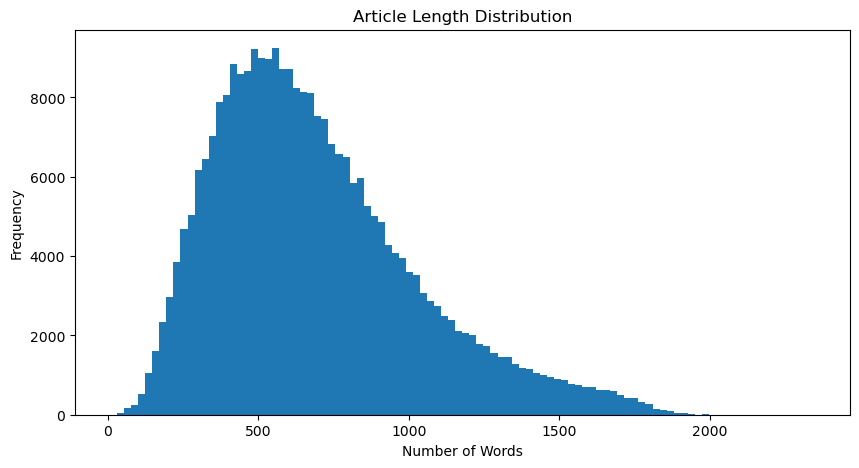

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["article_length"], bins=100)
plt.title("Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [47]:
df["article_length"].quantile([0.01, 0.99])

0.01     161.0
0.99    1674.0
Name: article_length, dtype: float64

In [48]:
lower = df["article_length"].quantile(0.01)
upper = df["article_length"].quantile(0.99)

outliers = df[(df["article_length"] < lower) | (df["article_length"] > upper)]
len(outliers)

5679

In [51]:
df = df.drop(columns=["summary_length"])

In [52]:
df[df["article_length"] < 20].shape

(3, 5)

In [53]:
short_articles = df[df["article_length"] < 20]
short_articles

,article,highlights,id,article_length,highlight_length
1706,Congressman Jared Polis . (D) Colorado: District 02 . Congressman Jason Chaffetz . (R) Utah: District 03 .,Two freshman representatives document their experience for CNN . Rep. Jared Polis is a Democrat representing Colorado's Second district . Rep. Jason Chaffetz is a Republican representing Utah's Third district .,86bd905861391cbd3a98de15c83768b6d1400304,18,31
2902,Congressman Jared Polis . (D) Colorado: District 02 . Congressman Jason Chaffetz . (R) Utah: District 03 .,Video: Hand-held cams track freshmen moves . Two freshman representatives document their experience for CNN . Rep. Jared Polis is a Democrat representing Colorado's Second district . Rep. Jason Chaffetz is a Republican representing Utah's Third district .,fd4bd93f0e11cec9a6c3f50441b6023b1e582581,18,38
244504,"Downton Abbey's famously grim butler, Mr Bates .","And now for the good news . . . Following a particularly grim week, here’s a compendium of some of the world’s most comforting headlines: . Supermodel Smiles On Catwalk . Jack Russell Dog Welcomes Stranger . Child At Funfair ‘Delighted’ By Goldfish . Katie Price Breasts ‘Roughly Same Size As Last Week’ Say Experts . Teenager Looks Up From Phone, Greets Parent . Political Pundits Agree To Stop Discussing Hung Parliament For Next Three Months . Diner Finishes His Curly Kale . Pensioner Looks Great In Party Hat . Celebrity Fails To Compare Life To Roller-coaster . Pet Hamster Repays Child’s Affection . ‘Cheer Up, It May Never Happen’ — Downton’s Mr Bates Enjoys Belly-laugh . Style Journalist Fails To Employ The Word ‘Iconic’ Sally Bercow Goes Out On Town, Retains Dignity . Entire Windfarm Operates According To Plan . Miley Cyrus Feels A Bit Chilly, Opts For Extra Layer .",c02baaf8e6c0cdbc4da3380403cba7acb0011d47,8,152


In [54]:
df_article_clean = df[df["article_length"] >= 20]

In [55]:
print("Original size:", df.shape)
print("After removing articles <20 words:", df_article_clean.shape)
print("Number removed:", df.shape[0] - df_article_clean.shape[0])

Original size: (287113, 5)
After removing articles <20 words: (287110, 5)
Number removed: 3


### Article Length Outlier Analysis

Statistical analysis identified length extremes at the 1st (161 words) and 99th percentile (1674 words). 
However, manual inspection revealed that shorter articles under 20 words were structurally inconsistent 
(e.g., metadata entries or title-only text), while longer articles represented legitimate long-form journalism. 

Therefore, only articles under 20 words were removed.

In [ ]:
# Missingness analysis

df.isnull().sum()

article           0
highlights        0
id                0
article_length    0
summary_length    0
dtype: int64

In [33]:
empty_articles = df[df["article"].str.strip() == ""]
empty_summaries = df[df["highlights"].str.strip() == ""]

print("Empty articles:", len(empty_articles))
print("Empty summaries:", len(empty_summaries))

Empty articles: 0
Empty summaries: 0
